# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 6: Samuele Voltan's notebook.</span>


In [1]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# FUNCTIONS
def error(AV, AV2, n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

def block_method(data): # Function for blocking method data analysis
    sum_prog = 0.
    sum2_prog = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum2_prog / (i+1)
        y[i,0] = AV
        y[i,1] = error(AV, AV2, i)
    return y

In [3]:
# DATA FILES
data_m = np.loadtxt("data/lab06/ex06.1/metropolis.out")
data_g = np.loadtxt("data/lab06/ex06.1/gibbs.out")
data_em = np.loadtxt("data/lab06/ex06.1/metropolis_extfield.out")
data_eg = np.loadtxt("data/lab06/ex06.1/gibbs_extfield.out")

### <span style="color:red"> Exercise 06.1

Complete the C++ code to simulate 1D Ising model with 
- the Metropolis sampling algorithm
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration. Compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

### <span style="color:orange"> Solution

We first present the results as the external field is absent ($h=0$). Of course, we do not show the magnetization.

In [4]:
title = ["Internal Energy", "Heat Capacity", "Magnetic Susceptibility"]
N_measure = 20
N_plot = 100
J = 1.0
Ns = 50

In [5]:
# Theoretical curves
x = np.linspace(0.5, 2.0, num = N_measure)
y_m = np.zeros([N_measure,2])
y_g = np.zeros([N_measure,2])
T = np.linspace(0.5, 2.0, num = N_plot)

b = 1/T
th = np.tanh(J/T)
thN = th**Ns
ch = 1/th
h = 0.02
X = b * np.exp(2*b*J) * (1 - thN)/(1 + thN)
e = -J*( th + ch*thN )/( 1 + thN )
C = ((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
f = [e, C, X]

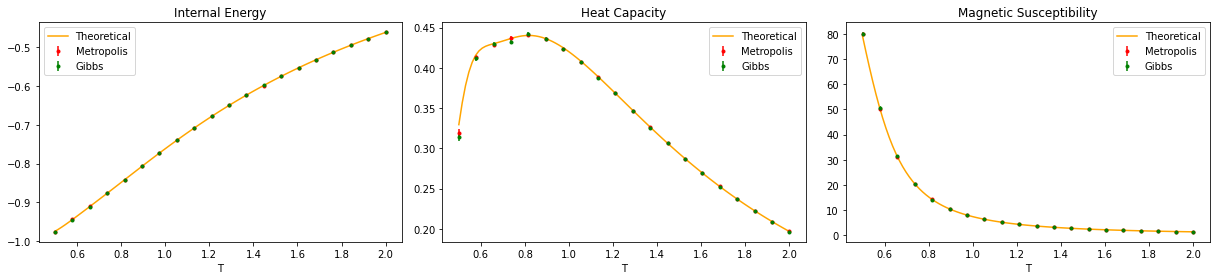

In [6]:
plt.figure(figsize=(17,4))
for j in range(3) :
    plt.subplot(1, 3, j+1)
    plt.title(title[j])
    plt.xlabel("T")
    # Experimental data using Metropolis
    for i in range(N_measure):
        m = block_method(data_m[100*i:100*(1+i), j])
        y_m[i, 0] = m[99, 0]
        y_m[i, 1] = m[99, 1]
    plt.errorbar(x, y_m[:,0], yerr = y_m[:,1], ls = 'none', marker = '.', color = 'red', label = 'Metropolis')
    plt.plot()
    # Experimental data using Gibbs
    for i in range(N_measure):
        g = block_method(data_g[100*i:100*(1+i), j])
        y_g[i, 0] = g[99, 0]
        y_g[i, 1] = g[99, 1]
    plt.errorbar(x, y_g[:,0], yerr = y_g[:,1], ls = 'none', marker = '.', color = 'green', label = 'Gibbs')
    plt.plot()
    plt.plot(T, f[j], color = 'orange', label = 'Theoretical')
    plt.legend()
    plt.tight_layout()

The simulated data are compatible with the theoretical predictions.

We also show the estimation of the observables at a fixed temperature $T=0.5$ with the blocking method.

Internal Energy (Metropolis) = -0.9749 ± 0.0005
Heat Capacity (Metropolis) = 0.3192 ± 0.0045
Magnetic Suceptibility (Metropolis) = 79.8096 ± 0.4551
Internal Energy (Gibbs) = -0.9750 ± 0.0007
Heat Capacity (Gibbs) = 0.3145 ± 0.0056
Magnetic Suceptibility (Gibbs) = 79.9477 ± 0.6382


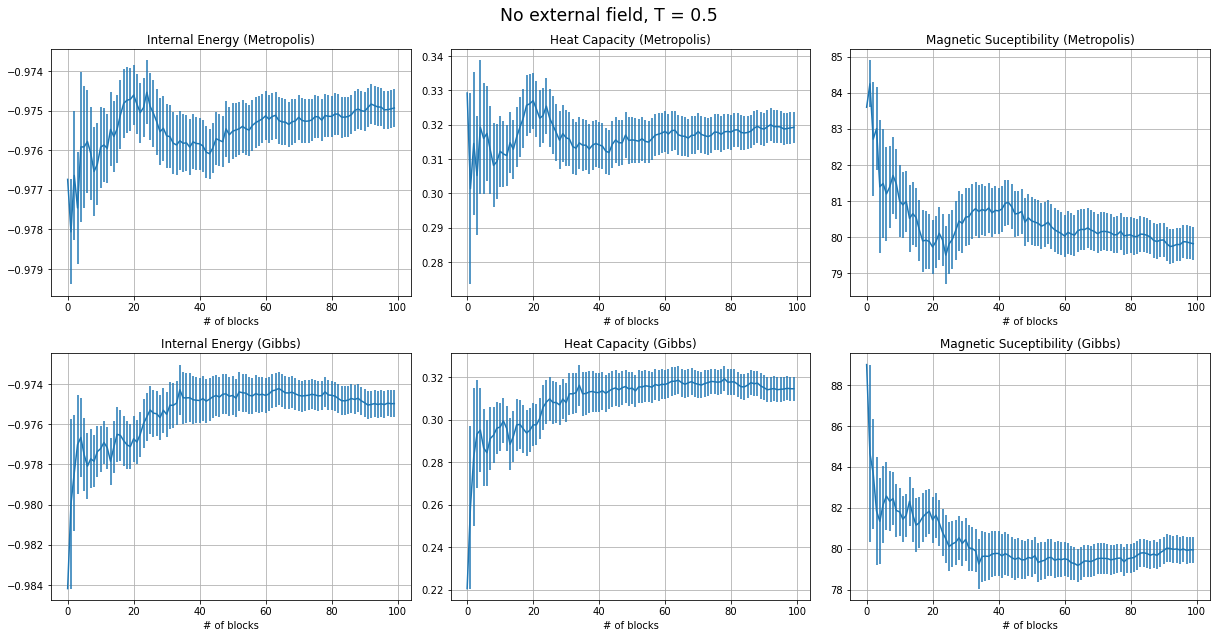

In [7]:
p = np.arange(100)
title_block = ["Internal Energy (Metropolis)", "Heat Capacity (Metropolis)", "Magnetic Suceptibility (Metropolis)",
         "Internal Energy (Gibbs)", "Heat Capacity (Gibbs)", "Magnetic Suceptibility (Gibbs)"]
plt.figure(figsize=(17,9))
plt.suptitle("No external field, T = 0.5", fontsize = "xx-large")
for j in range(3) :
    plt.subplot(2, 3, j+1)
    y = block_method(data_m[0:100, j])
    plt.errorbar(p, y[:,0], yerr = y[:,1])
    plt.xlabel(r"# of blocks")
    plt.grid(True)
    plt.tight_layout()
    plt.title(title_block[j])
    print(title_block[j] + f" = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
    plt.plot();
for j in range(3) :
    plt.subplot(2, 3, j+4)
    y = block_method(data_g[0:100, j])
    plt.errorbar(p, y[:,0], yerr = y[:,1])
    plt.xlabel(r"# of blocks")
    plt.grid(True)
    plt.tight_layout()
    plt.title(title_block[j+3])
    print(title_block[j+3] + f" = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
    plt.plot();
plt.tight_layout()

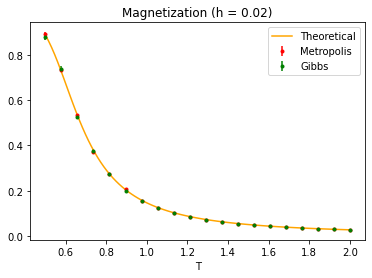

In [8]:
# Experimental data using Metropolis
for i in range(N_measure):
    m = block_method(data_em[100*i:100*(1+i), 3])
    y_m[i, 0] = m[99, 0]
    y_m[i, 1] = m[99, 1]
plt.errorbar(x, y_m[:,0], yerr = y_m[:,1], ls = 'none', marker = '.', color = 'red', label = 'Metropolis')
plt.plot()
# Experimental data using Gibbs
for i in range(N_measure):
    g = block_method(data_eg[100*i:100*(1+i), 3])
    y_g[i, 0] = g[99, 0]
    y_g[i, 1] = g[99, 1]
plt.errorbar(x, y_g[:,0], yerr = y_g[:,1], ls = 'none', marker = '.', color = 'green', label = 'Gibbs')
plt.plot()
plt.xlabel("T")
plt.plot(T, M, color = 'orange', label = 'Theoretical')
plt.title("Magnetization (h = 0.02)")
plt.legend()

Once again, the simulated data seem to be compatible with the theoretical predictions.

METROPOLIS M = 0.8901 ± 0.0099
GIBBS M = 0.8789 ± 0.0111


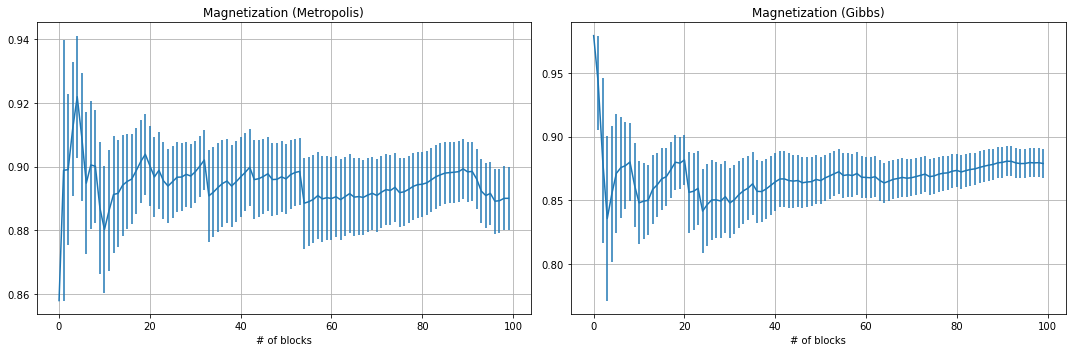

In [9]:
p = np.arange(100)
title_blockext = ["Magnetization (Metropolis)", "Magnetization (Gibbs)"]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
y = block_method(data_em[0:100, 3])
plt.errorbar(p, y[:,0], yerr = y[:,1])
print(f"METROPOLIS M = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
plt.xlabel(r"# of blocks")
plt.grid(True)
plt.title(title_blockext[0])
plt.plot();
plt.subplot(1, 2, 2)
y = block_method(data_eg[0:100, 3])
plt.errorbar(p, y[:,0], yerr = y[:,1])
print(f"GIBBS M = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
plt.xlabel(r"# of blocks")
plt.grid(True)
plt.title(title_blockext[1])
plt.tight_layout()
plt.plot();